# Demo:  Document Clustering and Latent Semantic Analysis

An important application of clustering is for sorting documents into groups.  In this demo, we will illustrate how to use the k-means algorithms for this task.  This example is taken mostly from one of the [sklearn examples](http://scikit-learn.org/stable/auto_examples/text/document_clustering.html).

Through the demo, you will learn how to:
* Compute the TF-IDF scores for documents in the corpus
* Run k-means on the TF-IDF features to cluster documents
* Run LSA (i.e., PCA) on the TF-IDF features to cluster documents
* Run NMF to cluster documents

## Loading the Data

First, we load the standard packages.

In [1]:
import numpy as np

The [UseNet newsgroups](https://en.wikipedia.org/wiki/Usenet_newsgroup) were popular in the 1990s as online forums for discussing various topics.  Although they are not used much today for discussions, the UseNet data is widely-used in machine learning classes to demonstrate various text processing methods.  The `sklearn` package has the [20newsgroups](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset) dataset, which has about 18000 posts on 20 topics.  It can be loaded via `fetch_20newsgroups`.  We will use only four of the 20 topics for this demo.

In [2]:
from sklearn.datasets import fetch_20newsgroups

load_all = False # load all categories?

if load_all:
    categories = None
else:    
    categories = [
        'alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space',
    ]

remove = ('headers', 'footers')
dataset = fetch_20newsgroups(subset='all', categories=categories,
                             remove = remove, shuffle=True, random_state=42)
print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


`dataset.target` is a vector of labels.  Let's print a few of them out.  Also, we can use the `np.unique` command to compute the number of unique labels, which should equal 4.  

In [3]:
labels = dataset.target # label vector 
print(labels[1:20])
true_k = len(np.unique(labels)) # number of classes

[1 1 3 1 1 2 2 2 0 1 2 3 2 0 3 3 1 1 2]


We can find the number of data samples as follows:

In [4]:
print("num_samp = %d" % labels.size)

num_samp = 3387


`dataset.data` contains the UseNet text data.  Each entry `dataset.data[i]` is a string corresponding to one post.  We can print an example as follows.

In [5]:
doc_ind = 10  # Index of an example document
data_ex = dataset.data[doc_ind]
cat_ex  = dataset.target_names[labels[doc_ind]]
print('Post from {0:s}:'.format(cat_ex))
print()
print(data_ex)

Post from comp.graphics:


Hallo POV-Renderers !
I've got a BocaX3 Card. Now I try to get POV displaying True Colors
while rendering. I've tried most of the options and UNIVESA-Driver
but what happens isn't correct.
Can anybody help me ?



## Computing TF-IDF features

Documents are text, but machine learning algorithms want numbers.  So, we need to extract numerical features from the documents.  One of the most popular methods is the so-called TF-IDF score.  First, we make a list of all (non-common) words in the corpus.  Each word is sometimes called a *term* or a *token*.  For each term `j` and document `i`, we compute the feature
      
    X[i,j] = TF-IDF score of term j in document i
           = term_freq[i,j] * inverse_doc_freq[j]
           
where

    term_freq[i,j]  = (#occurances of term j in doc i)/(#terms in doc i)  
    inverse_doc_freq[j] = -log( #docs with term j / #docs in corpus )
        
In the data matrix `X`, each document `i` is represented by a vector `X[i,:]`.

The data matrix `X` can be computed by a *vectorizer*.  Writing an efficient vectorizer is somewhat time-consuming.  Luckily, `sklearn` has very good routines to do this.  We first create a `TfidfVectorizer` object, and then use it to compute the TF-IDF features.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english') # remove English stopwords

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

n_samples: 3387, n_features: 38777


We can display the terms with the highest TF-IDF scores in a document as follows.

In [7]:
doc_ind = 10  # Index of an example document
xi = X[doc_ind,:].todense()
term_ind = xi.argsort()[:, ::-1]
xi_sort = xi[0,term_ind]
terms = vectorizer.get_feature_names()

for i in range(30):
    term = terms[term_ind[0,i]]
    tfidf = xi[0,term_ind[0,i]]
    print('{0:20s} {1:f} '.format(term, tfidf))

pov                  0.417453 
hallo                0.314297 
bocax3               0.314297 
renderers            0.280154 
univesa              0.273361 
ve                   0.216374 
displaying           0.215961 
rendering            0.206597 
options              0.205576 
driver               0.199119 
happens              0.187562 
colors               0.184011 
card                 0.177312 
tried                0.163320 
anybody              0.157071 
correct              0.155991 
isn                  0.132214 
got                  0.127099 
try                  0.126131 
help                 0.125774 
true                 0.124041 
determining          0.000000 
determinism          0.000000 
determininant        0.000000 
deterministic        0.000000 
determnined          0.000000 
determines           0.000000 
deterrant            0.000000 
determined           0.000000 
detest               0.000000 


## Running K-Means

We now run k-means on the TF-IDF features in an attempt to cluster the documents.  First, we instantiate a `KMeans` object, and then we run the algorithm using the `fit` method.  We'll use the `++` initialization in an attempt to avoid local minima.

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=True, random_state=1)
km.fit(X)

Initialization complete
Iteration 0, inertia 6461.628264313481
Iteration 1, inertia 3306.315949575553
Iteration 2, inertia 3296.9470173231202
Iteration 3, inertia 3294.6351134679676
Iteration 4, inertia 3293.6986887371013
Iteration 5, inertia 3293.0801132179845
Iteration 6, inertia 3292.685821975408
Iteration 7, inertia 3292.4392047796755
Iteration 8, inertia 3292.227604782814
Iteration 9, inertia 3292.101241732236
Iteration 10, inertia 3292.043203528274
Iteration 11, inertia 3292.0009832615897
Iteration 12, inertia 3291.952664071326
Iteration 13, inertia 3291.913997506929
Iteration 14, inertia 3291.8647964067823
Iteration 15, inertia 3291.823791633892
Iteration 16, inertia 3291.767778882536
Iteration 17, inertia 3291.7208888575983
Iteration 18, inertia 3291.696356271001
Iteration 19, inertia 3291.685853667515
Iteration 20, inertia 3291.679134499338
Converged at iteration 20: strict convergence.


KMeans(max_iter=100, n_clusters=4, n_init=1, random_state=1, verbose=True)

To get a sense for the results of k-means, we print out the terms in each centroid with the 10 largest TF-IDF values.  You can see that K-means has found centroids that seem to correspond to the newsgroups topics.

In [9]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(true_k):
    print("Centroid %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Centroid 0: god jesus people objective sandvik don believe moral say morality
Centroid 1: edu writes article com just think people don like know
Centroid 2: graphics thanks image file files program format know images looking
Centroid 3: space nasa shuttle launch orbit moon edu writes gov just


## Comparison of clusters to newsgroup categories

To get a quantitative measure of how well k-means is matching the newsgroup topics, we create a sort of confusion matrix `C` where:

`C[i,j] = ` the fraction of cluster `j` that came from newsgroup topic `i`.

That is, the columns of the confusion matrix are normalized so that they sum to one.  If k-means was perfectly clustering according to the newsgroup topics, each column of `C` would contain a single value equal to one and the other values equal to zero.

In [10]:
from sklearn.metrics import confusion_matrix

labelkm = km.labels_
Cnorm = confusion_matrix(labels,labelkm,normalize='pred')
with np.printoptions(precision=3, suppress=True):
    print(Cnorm)

[[0.548 0.342 0.004 0.002]
 [0.    0.165 0.938 0.008]
 [0.002 0.233 0.052 0.989]
 [0.45  0.26  0.006 0.002]]


To interpret this confusion matrix, let's remember what the newsgroup categories were:

In [11]:
dataset.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

Looking at the confusion matrix, we see that the last two clusters are dominated by a single newsgroup topic, comp.graphics and sci.space, respectively.  The first cluster is a mix between alt.atheism and talk.religion.misc, which makes sense because these two topics have a lot of overlap.  But the second cluster has a significant proportion of words from all four topics, so it doesn't seem to be well designed.

We now print an example of a document that came from a topic that is different from the most common topic in that cluster (i.e., a clustering error).  In particular, we'll print an example of an `alt.atheism` post in the cluster that is dominated by `comp.graphics`.

In [12]:
ind_true = 0 # index of alt.atheism
ind_cluster = Cnorm[3,:].argmax() # cluster dominated by comp.graphics

cat_true  = dataset.target_names[ind_true]
print('Actual newsgroup: {0:s}'.format(cat_true))
print('Cluster index: {0:d}'.format(ind_cluster))
print()

# find all documents with category=ind_true and cluster=ind_cluster
I = np.where((labels==ind_true) & (labelkm==ind_cluster))[0]
# choose one of these documents
doc_ind = I[0]
data_ex = dataset.data[doc_ind]
# print the document
print(data_ex)

Actual newsgroup: alt.atheism
Cluster index: 0

sandvik@newton.apple.com (Kent Sandvik) writes:

>>To borrow from philosophy, you don't truly understand the color red
>>until you have seen it.
>Not true, even if you have experienced the color red you still might
>have a different interpretation of it.

But, you wouldn't know what red *was*, and you certainly couldn't judge
it subjectively.  And, objectivity is not applicable, since you are wanting
to discuss the merits of red.


After reading the above `alt.atheism` post, it is not surprising that it was grouped together with `comp.graphics` posts, because it frequently uses the terms `color` and `red`. 

## Latent Semantic Analysis

Another important tool in document analysis is [latent semantic analysis (LSA)](https://en.wikipedia.org/wiki/Latent_semantic_analysis).  In LSA, we basically perform PCA on the TF-IDF feature matrix `X`.  For this, we compute the SVD

    X = U diag(S) Vt 
    
where the rows of `Vt` contain the principal components (PCs) of `X`.  Note that if we define `A = U diag(S)` then `X = A Vt`.  

It turns out that the TF-IDF matrix `X` is a sparse matrix:  

In [13]:
type(X)

scipy.sparse.csr.csr_matrix

In fact, less than 1% of the entries in `X` are nonzero:

In [14]:
h,w = X.get_shape()
sparsity = X.count_nonzero()/(h*w)
print("sparsity = %f" % sparsity)

sparsity = 0.002404


Because `X` is sparse, it is preferable to use the sparse version of the SVD, `svds`:

In [15]:
import scipy.sparse.linalg
U,S,Vt = scipy.sparse.linalg.svds(X,k=300)

We now plot the singular values. We see that the first few singular values are significantly larger than the remaining singular values, suggesting that the term-document matrix `X` has an approximately low-rank structure.

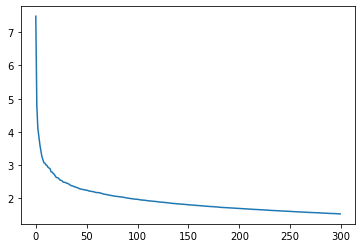

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(S[::-1])

Given the approximately low-rank structure of `X`, we can approximate it using a small number components (i.e., small `R`): 

     X[i,j] \approx \sum_{k=1}^R U[i,k] S[k] Vt[k,j]
     
There are two motivations for doing so:
* Topic modeling:  One interpretation is that each principal component (PC) represents a *topic* in the corpus.  In other words, the rows `Vt[:,k]` of the `Vt` matrix can be linearly combined to approximate any row of `X`, i.e., any document vector `X[i,:]`, where each row of `Vt` (i.e., each PC) represents one topic.  
* Topic modeling:  Likewise, the columns `U[:,k]` of the `U` matrix can be linearly combined to approximate any column of `X`, i.e., any term vector `X[:,j]`, where each column of `U` (i.e., each PC) represents one topic.
* Document clustering: The `k`th entry of the row vector `U[i,:]` gives a value that measures the relationship between topic `k` and document `i`.  We could try to cluster the `i`th document by looking for the entry `k` with the largest magnitude, as we'll do below.
* Word and document embeddings:  The row vector `U[i,:]` provides a low-dimensional summary of the `i`th document.  This is a useful quantity for many natural processing (NLP) methods.  This type of representation is closely related to an important topic of *word embeddings* and *document embeddings*.

To get an idea of the words within each PC, we print the words for the largest-magnitude entries in the first few PCs.

In [17]:
Vt_sort = np.abs(Vt).argsort()[:, ::-1]
for k in range(true_k):
    print("PC %d:" % k, end='')
    for ind in Vt_sort[k, :10]:
        print(' %s' % terms[ind], end='')
    print()

PC 0: 3do rh craig post site number vesa terrorist days society
PC 1: allah send anti test ye 3do faq actually dos posted
PC 2: phigs program new psilink p00261 zip universe thing lot send
PC 3: free polygon rle rh phigs read set siggraph convert different


Unfortunately, these principle components don't seem to match the newsgroup topics.

To get a more quantitative view of LSA's clustering performance, let's try hard document clustering by assigning each document `i` to the topic index `k` that has the largest magnitude value in the PC vector `U[i,:]`.  After we compute hard labels for all documents, we compute the confusion matrix, as before.

In [18]:
labelsvd = np.argmax(abs(U[:,:true_k]),axis=1)
Csvd = confusion_matrix(labels,labelsvd,normalize='pred')
with np.printoptions(precision=3, suppress=True):
    print(Csvd)

[[0.205 0.248 0.252 0.24 ]
 [0.299 0.259 0.291 0.299]
 [0.298 0.294 0.271 0.303]
 [0.198 0.199 0.185 0.158]]


We see from the above confusion matrix that LSA is not doing a good clustering.  

## Nonnegative matrix factorization (NMF)

Another approach to matrix factorization is to approximate

    X \approx W H 
    
where `W` is tall with `R` columns, `H` is wide with `R` columns, and all elements in `W` and `H` are nonnegative. 
This is called nonnegative matrix factorization, or NMF.
The approximation is constructed to minimize the RSS of the approximation error, X-W H.
Although this is a non-convex problem, there are good solvers, such as the one supplied in sklearn.

The main difference betwen NMF and LSA (where `X \approx A Vt`) is that NMF gives nonnegative factors `W` and `H`, whereas LSA gives factors with positive and negative values.  Thus, the outputs of NMF are clearly interpretable: the values in the `i`th row vector `W[i,:]` show the strength of the `i`th document across the `R` topics. Likewise, the values in the `j`th column vector `H[:,j]` show the importance of the `j`th term across the `R` topics.

In [19]:
import sklearn.decomposition

n_nmf = true_k
nmf = sklearn.decomposition.NMF(n_components=n_nmf, random_state=1)
W = nmf.fit_transform(X)
H = nmf.components_
H.shape

/Users/schniter.1/anaconda3/envs/default/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(4, 38777)

Let's print the top terms in each of the NMF term components

In [20]:
H_sort = H.argsort()[:, ::-1]
for k in range(n_nmf):
    print("NMF %d:" % k, end='')
    for ind in H_sort[k, :10]:
        print(' %s' % terms[ind], end='')
    print()

NMF 0: god jesus people believe bible christian don religion edu com
NMF 1: graphics image thanks file files format program gif images ftp
NMF 2: space nasa edu shuttle orbit launch moon writes earth article
NMF 3: objective morality moral edu livesey frank writes keith cobb values


Qualitatively, we can see that NMF does a decent job of clustering the religious terms, graphics terms, and space terms together.
In fact, it seemed to be able to discern `alt.atheism` terms like `morality`, `moral`, `think`, `objective` from the `talk.religion.misc` terms like `god`, `jesus`, `christian`, `bible`.

To get a more quantitative view, we can do hard document clustering by assigning the `i`th document to the index in `W[i,:]` with the largest value.  One we have clustered all of the documents, we can compute the confusion matrix, as before.

In [21]:
labelnmf = np.argmax(W,axis=1)
Cnmf = confusion_matrix(labels,labelnmf,normalize='pred')
with np.printoptions(precision=3, suppress=True):
    print(Cnmf)

[[0.508 0.012 0.043 0.653]
 [0.014 0.926 0.047 0.035]
 [0.012 0.047 0.85  0.04 ]
 [0.467 0.016 0.059 0.273]]


From the confusion matrix, we see that NMF did a good job of clustering the `comp.graphics` and `sci.space` posts.  The posts from `alt.atheism` and `talk.religion.misc` were mixed together in the first and last clusters, which is not surprising the overlap between these topics.  But NMF did a better job of separating them than k-means did: the last NMF cluster is about 2/3 populated with `alt.atheism`.  Also, remember that k-means produced one cluster that didn't correspond to any newsgroup topic.